In [1]:
from BERT import BERT
from BERT import mlm_custom_loss, nsp_custom_loss
import numpy as np
import tensorflow as tf

DISERT_DATA_PATH = r'C:\Users\yunus\Desktop\DisERT Data'

X_MLM = np.load(f'{DISERT_DATA_PATH}\X_MLM.npy')
Y_MLM = np.load(f'{DISERT_DATA_PATH}\Y_MLM.npy')
X_NSP = np.load(f'{DISERT_DATA_PATH}\X_NSP.npy')
Y_NSP = np.load(f'{DISERT_DATA_PATH}\Y_NSP.npy')

X_MLM = X_MLM[:4000]
X_NSP = X_NSP[:4000]
Y_MLM = Y_MLM[:4000]
Y_NSP = Y_NSP[:4000]

In [2]:
oDisERT = BERT(
    mlm_input_shape = (10, 129), 
    nsp_input_shape = (1, 129),
    nr_of_encoder_blocks = 4,
    attention_key_dims = 32,
    attention_nr_of_heads = 2,
    attention_dense_dims = 128,
    dropout_rate = 0.0
)

oDisERT.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
    loss = [mlm_custom_loss, nsp_custom_loss]
)


oDisERT.fit(
    x = [X_MLM, X_NSP], 
    y = [Y_MLM, Y_NSP], 
    batch_size= 512,
    epochs=2,
    verbose=1,
    # callbacks = [oDisERTCheckPoint, oCsvLogger, oLearningRateReducer, oEarlyStopper, oThresholdStopper]
)

Epoch 1/2
8/8 [==============================] - 10s 284ms/step - loss: 2.1602 - mlm_classifier_loss: 0.0555 - nsp_classifier_loss: 2.1046
Epoch 2/2
8/8 [==============================] - 2s 270ms/step - loss: 0.9919 - mlm_classifier_loss: 0.0492 - nsp_classifier_loss: 0.9427


In [3]:
oDisERT.summary()

Model: "bert_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 mlm_input (InputLayer)         [(None, 10, 129)]    0           []                               
                                                                                                  
 nsp_input (InputLayer)         [(None, 1, 129)]     0           []                               
                                                                                                  
 concatenate_inputs (Concatenat  (None, 11, 129)     0           ['mlm_input[0][0]',              
 e)                                                               'nsp_input[0][0]']              
                                                                                                  
 tf.math.add (TFOpLambda)       (None, 11, 129)      0           ['concatenate_inputs[0][0]']

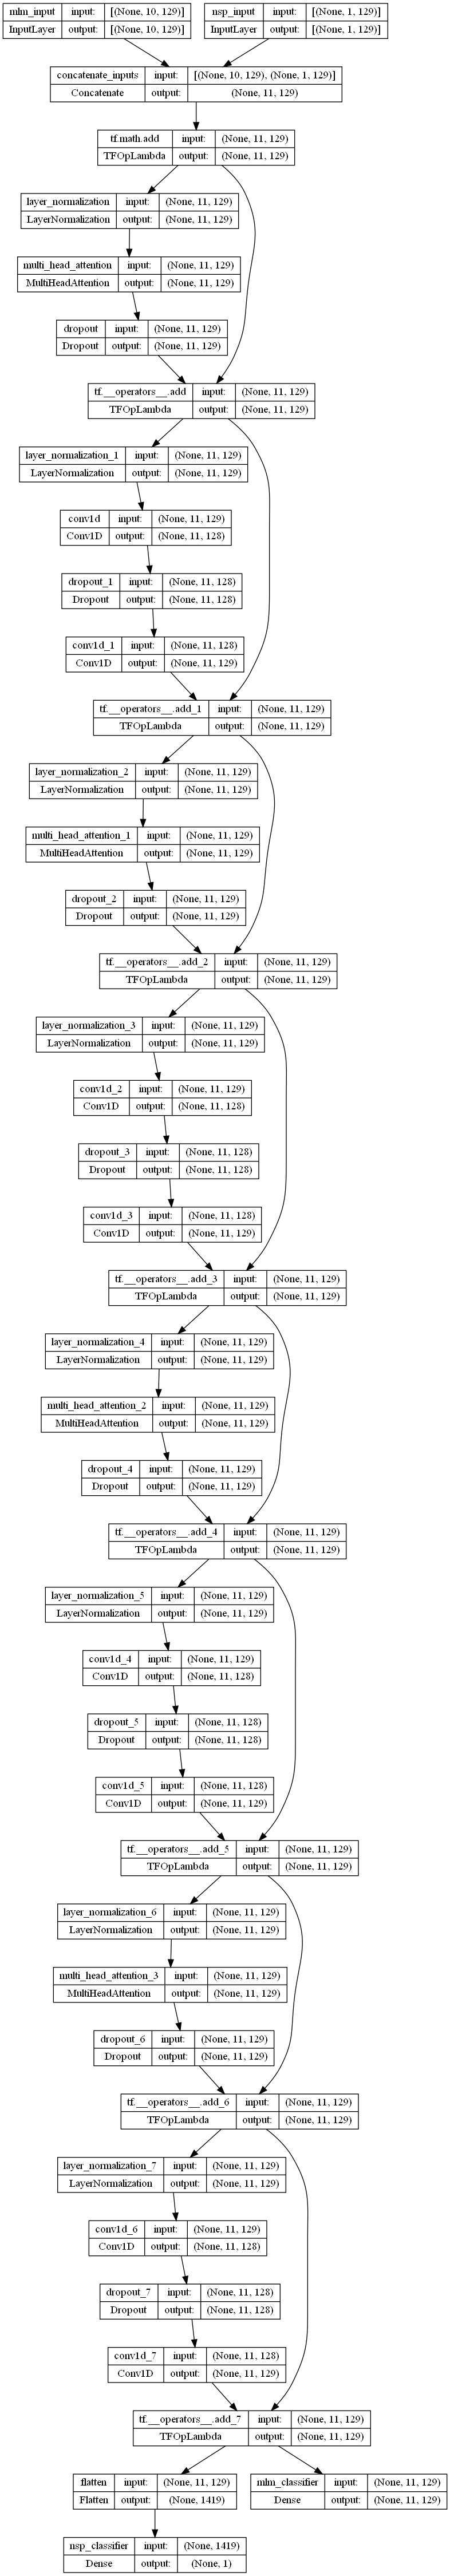

In [4]:
tf.keras.utils.plot_model(oDisERT, show_shapes=True)